In [1]:
import pandas as pd
import sqlite3

In [2]:
logs_db = sqlite3.connect('logs_db.db')

In [3]:
# create df from db
logs_mar_df = pd.read_sql_query('SELECT * from data_use WHERE date > 20170131 AND date < 20170301', logs_db)

In [4]:
logs_mar_df.head()

,index,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,88,mSM/P4XpWcuQUGnhL0vaCDEGjmM/7YaWew6O/eE5mV4=,20170225,0,0,1,0,5,6,1526.661
1,105,q3MXOPoaa2SCN4bnPQ0Jr7o4vuN/F0FVhSLZufI70SM=,20170222,1,0,0,0,9,3,2326.392
2,109,GI65XroKbX7GEywRnPDVL7xc6ZTy/yGstLrYcIdrH0U=,20170219,0,0,0,1,68,55,16841.755
3,120,9IzdFLkXN+UUsGLLC3C5cEaChLBk/NhJWIwM+CvsMbE=,20170220,3,1,0,1,6,9,2040.429
4,139,yL5Zpo+LChf06dj8zl75Pn/b9+kRzZQq74Kd7qouckI=,20170204,3,1,3,2,32,32,9349.600


In [5]:
logs_mar_df.drop('index', axis=1, inplace=True)

In [6]:
logs_mar_df.shape

(16079619, 9)

In [7]:
logs_mar_df.date.min(), logs_mar_df.date.max()

(20170201, 20170228)

In [8]:
logs_mar_df.isnull().sum()

msno          0
date          0
num_25        0
num_50        0
num_75        0
num_985       0
num_100       0
num_unq       0
total_secs    0
dtype: int64

In [9]:
# keep most recent log date
logs_mar_df_sorted = logs_mar_df.sort_values(['msno', 'date'], 
                                              ascending=False).reset_index(drop = True)
logs_mar_df_sorted.head(10)

,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,zzzF1KsGfHH3qI6qiSNSXC35UXmVKMVFdxkp7xmDMc0=,20170226,0,0,0,1,61,62,15948.815
1,zzzF1KsGfHH3qI6qiSNSXC35UXmVKMVFdxkp7xmDMc0=,20170225,0,0,0,0,15,15,3583.366
2,zzzF1KsGfHH3qI6qiSNSXC35UXmVKMVFdxkp7xmDMc0=,20170224,0,0,1,0,10,11,2522.410
3,zzzF1KsGfHH3qI6qiSNSXC35UXmVKMVFdxkp7xmDMc0=,20170223,0,0,0,0,9,9,2207.788
4,zzzF1KsGfHH3qI6qiSNSXC35UXmVKMVFdxkp7xmDMc0=,20170222,0,0,0,1,34,35,9150.012
5,zzzF1KsGfHH3qI6qiSNSXC35UXmVKMVFdxkp7xmDMc0=,20170221,3,1,0,1,60,60,14825.633
6,zzzF1KsGfHH3qI6qiSNSXC35UXmVKMVFdxkp7xmDMc0=,20170220,0,0,0,0,34,20,9198.848
7,zzzF1KsGfHH3qI6qiSNSXC35UXmVKMVFdxkp7xmDMc0=,20170219,0,0,1,0,27,28,7116.762
8,zzzF1KsGfHH3qI6qiSNSXC35UXmVKMVFdxkp7xmDMc0=,20170211,0,0,0,0,7,7,1500.434
9,zzzF1KsGfHH3qI6qiSNSXC35UXmVKMVFdxkp7xmDMc0=,20170210,1,0,0,0,5,6,1305.343


In [10]:
logs_mar_last_df = logs_mar_df_sorted.drop_duplicates(subset='msno', keep='first').reset_index(drop=True)
logs_mar_last_df.columns = logs_mar_last_df.columns + '_last'
logs_mar_last_df = logs_mar_last_df.rename(columns={'msno_last': 'msno'})
logs_mar_last_df['date_last_dt'] = pd.to_datetime(logs_mar_last_df['date_last'], 
                                                        format='%Y%m%d',
                                                        errors='ignore')    

logs_mar_last_df['days_from_last_log'] = 28 - logs_mar_last_df['date_last_dt'].dt.day
logs_mar_last_df

,msno,date_last,num_25_last,num_50_last,num_75_last,num_985_last,num_100_last,num_unq_last,total_secs_last,date_last_dt,days_from_last_log
0,zzzF1KsGfHH3qI6qiSNSXC35UXmVKMVFdxkp7xmDMc0=,20170226,0,0,0,1,61,62,15948.815,2017-02-26,2
1,zzz1Dc3P9s53HAowRTrm3fNsWju5yeN4YBfNDq7Z99Q=,20170228,5,0,2,1,11,14,3594.808,2017-02-28,0
2,zzy7iqSpfcRq7R4hmKKuhI+CJRs79a6pteqEggpiNO0=,20170228,3,2,1,3,19,14,4859.799,2017-02-28,0
3,zzy0oyiTnRTo5Mbg23oKbBkf9eoaS7+eU4V+d14bzfY=,20170223,0,0,0,0,1,1,172.000,2017-02-23,5
4,zzxqpgPX1epGyR3SVRKb3XitWdt+JqDURxV5ea1D7Cg=,20170228,26,2,2,6,40,51,10656.360,2017-02-28,0
...,...,...,...,...,...,...,...,...,...,...,...
1114159,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,20170228,0,0,0,0,4,1,878.226,2017-02-28,0
1114160,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,20170228,23,13,8,5,29,69,10686.884,2017-02-28,0
1114161,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,20170228,0,0,0,0,10,10,2282.190,2017-02-28,0
1114162,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,20170228,13,3,1,2,42,49,11129.183,2017-02-28,0


In [11]:
# Aggregation sum

In [12]:
logs_mar_sum_df = logs_mar_df.copy()
logs_mar_sum_df.columns

Index(['msno', 'date', 'num_25', 'num_50', 'num_75', 'num_985', 'num_100',
       'num_unq', 'total_secs'],
      dtype='object')

In [13]:
logs_mar_sum_df.drop('date', axis=1, inplace=True)

In [14]:
logs_mar_sum_df = logs_mar_sum_df.groupby('msno').sum().reset_index()
logs_mar_sum_df.columns = logs_mar_sum_df.columns + '_sum' 
logs_mar_sum_df = logs_mar_sum_df.rename(columns={'msno_sum': 'msno'})

In [15]:
logs_mar_sum_df.head()

,msno,num_25_sum,num_50_sum,num_75_sum,num_985_sum,num_100_sum,num_unq_sum,total_secs_sum
0,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,19,6,4,13,888,746,220379.147
1,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,116,61,58,114,468,642,156533.957
2,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,29,17,15,22,762,722,189007.847
3,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,188,80,46,46,383,551,123768.839
4,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,103,47,27,32,258,194,78863.188


In [16]:
logs_mar_sum_df.msno.nunique()

1114164

In [17]:
# Aggregation mean

In [18]:
logs_mar_mean_df = logs_mar_df.copy()
logs_mar_mean_df.drop('date', axis=1, inplace=True)
logs_mar_mean_df = logs_mar_mean_df.groupby('msno').mean().reset_index()
logs_mar_mean_df.columns = logs_mar_mean_df.columns + '_mean' 
logs_mar_mean_df = logs_mar_mean_df.rename(columns={'msno_mean': 'msno'})

In [19]:
logs_mar_mean_df.head()

,msno,num_25_mean,num_50_mean,num_75_mean,num_985_mean,num_100_mean,num_unq_mean,total_secs_mean
0,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,1.117647,0.352941,0.235294,0.764706,52.235294,43.882353,12963.479235
1,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,4.296296,2.259259,2.148148,4.222222,17.333333,23.777778,5797.553963
2,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,1.035714,0.607143,0.535714,0.785714,27.214286,25.785714,6750.280250
3,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,9.400000,4.000000,2.300000,2.300000,19.150000,27.550000,6188.441950
4,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,4.120000,1.880000,1.080000,1.280000,10.320000,7.760000,3154.527520


In [20]:
logs_mar_mean_df.msno.nunique()

1114164

In [21]:
train = pd.read_pickle('Data/train_v2_scala_clean.pickle')

In [22]:
logs_mar = pd.merge(train, logs_mar_last_df, on='msno', how='left')
logs_mar = pd.merge(logs_mar, logs_mar_sum_df, on='msno', how='left')
logs_mar = pd.merge(logs_mar, logs_mar_mean_df, on='msno', how='left')
logs_mar.head()

,msno,is_churn,date_last,num_25_last,num_50_last,num_75_last,num_985_last,num_100_last,num_unq_last,total_secs_last,...,num_100_sum,num_unq_sum,total_secs_sum,num_25_mean,num_50_mean,num_75_mean,num_985_mean,num_100_mean,num_unq_mean,total_secs_mean
0,++4RuqBw0Ss6bQU4oMxaRlbBPoWzoEiIZaxPM04Y4+U=,0.0,20170220.0,3.0,0.0,0.0,1.0,4.0,7.0,1368.191,...,4.0,7.0,1368.191,3.000000,0.000000,0.000000,1.000000,4.000000,7.000000,1368.191000
1,+/HS8LzrRGXolKbxRzDLqrmwuXqPOYixBIPXkyNcKNI=,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,+/g9O3USecrC8npzaFHXW/2XJ7fB80SineiUoCg7M6o=,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,+/namlXq+u3izRjHCFJV4MgqcXcLidZYszVsROOq/y4=,0.0,20170227.0,53.0,3.0,3.0,1.0,110.0,145.0,29421.351,...,719.0,1315.0,200588.424,25.000000,1.160000,1.040000,1.200000,28.760000,52.600000,8023.536960
4,+0/X9tkmyHyet9X80G6GTrDFHnJqvai8d1ZPhayT0os=,0.0,20170228.0,10.0,0.0,0.0,2.0,72.0,15.0,18436.324,...,1365.0,566.0,347686.377,9.592593,1.333333,0.851852,2.444444,50.555556,20.962963,12877.273222


In [23]:
logs_mar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 886500 entries, 0 to 886499
Data columns (total 26 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   msno                886500 non-null  object        
 1   is_churn            886500 non-null  float64       
 2   date_last           682235 non-null  float64       
 3   num_25_last         682235 non-null  float64       
 4   num_50_last         682235 non-null  float64       
 5   num_75_last         682235 non-null  float64       
 6   num_985_last        682235 non-null  float64       
 7   num_100_last        682235 non-null  float64       
 8   num_unq_last        682235 non-null  float64       
 9   total_secs_last     682235 non-null  float64       
 10  date_last_dt        682235 non-null  datetime64[ns]
 11  days_from_last_log  682235 non-null  float64       
 12  num_25_sum          682235 non-null  float64       
 13  num_50_sum          682235 no

<AxesSubplot:>

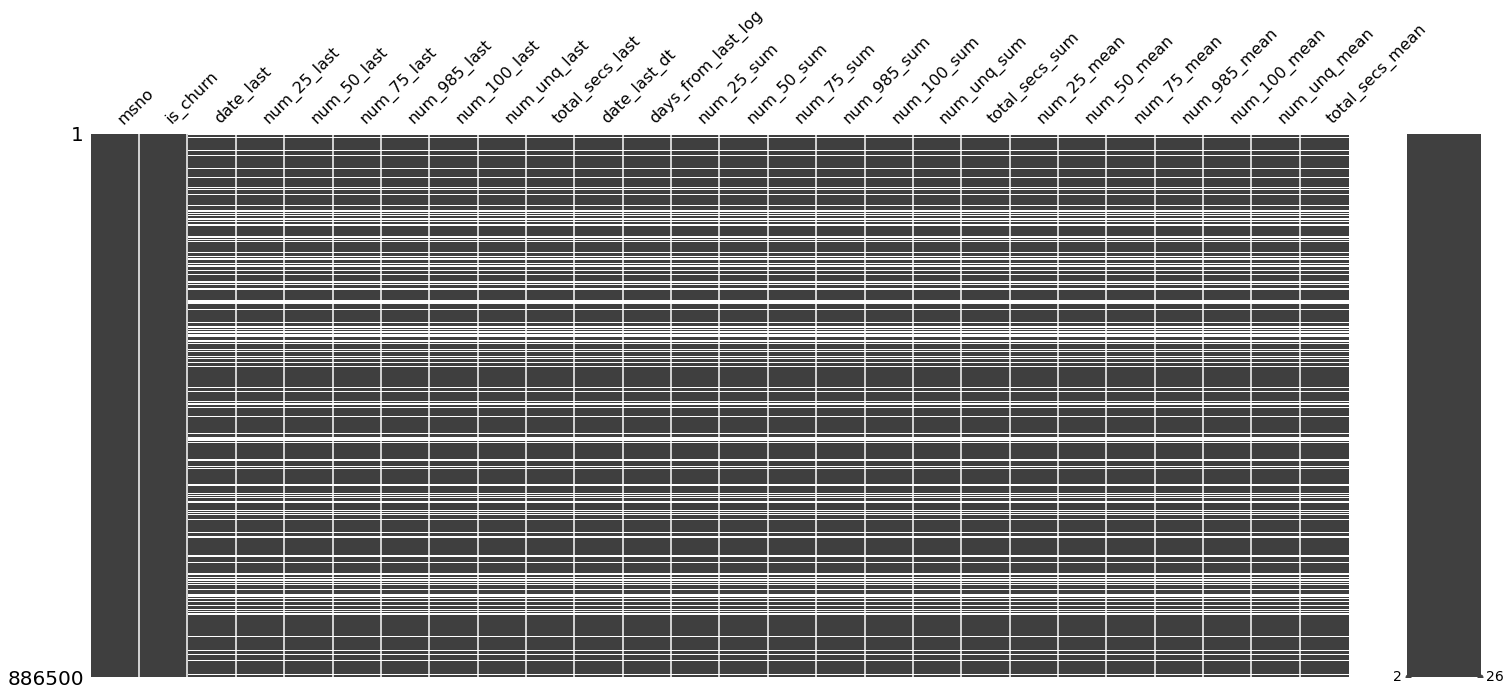

In [24]:
import missingno as ms
import matplotlib.pyplot as plt 

ms.matrix(logs_mar)

In [25]:
import pickle

with open('Data/Processed/logs_mar.pickle', 'wb') as handle:
    pickle.dump(logs_mar, handle)